# Administración Financiera Internacional
## Ejercicios
## Iván de Luna Aldape

## Ejercicios de coberturas

### Riesgos lineales - Hedge Ratio Óptimo

Existe el concepto del hedge ratio para determinar la cantidad de la posición de contratos de futuro o forwards en relación al tamapo de la exposición.

$$
h = -\rho \frac{\sigma_{S}}{\sigma_{F}}
$$

en donde $\sigma_{s}$ y $\sigma_{f}$ son las desviaciones estándar del valor que vamos a cubrir, $S$, y el del futuro o forward $F$ y h es el hedge ratio que tiene la mínima varianza.

Una aerolínea necesita comprar 10,000 toneladas métricas de combustible para jet en 3 meses. Quiere cubrirse sobre un alza de precios usando contratos de futuro.

Esto puede hacerlo mediante coberturas de combustible para calefacción en el NYMEX. El valor nocional del contrato es por 42,000 galones, y el precio actual del combustible para jet es de $ 277 por tonelada métrica. El precio del futuro del combustible para calefacción es de $0.6903 por galón.

Las desviaciones estándar del cmabio en el precio en tres meses se calculan en 21.17% y de los futuros en 18.59% con una correlación de 0.8243

En este caso tenemos:

- Comprar 10,000 toneladas métricas de combustible
- Tiempo 3 meses
- Futuro de combustible para calefacción
- Notional del Futuro: 42,000 galones
- Precio spot del combustible de jet: $277
- Precio del futuro: $0.6903 galón

- $\sigma_{s} = 21.17$

- $\sigma_{f} = 18.59$

- $\rho_{sf} = 0.8243$

1. Calcular el valor nocional y la desviación estándar del combustible sin cobertura.

In [68]:
# Empezamos por declarar variables
q_s = 10000 # toneladas métricas
q_f = 42000 # cantida de futuro
px_spot = 277 # precio por galón
px_futuro = 0.6903 # precio contrato
sigma_s = 0.2117 # s.d. spot
sigma_f = 0.1859 # s.d. futuro
rho_sf = 0.8243 # Correlación 

Determinamos la cantidad nocional de S

In [69]:
q_cantidad = q_s*px_spot
print("La cantidad que necesitamos es de: ", q_cantidad)

La cantidad que necesitamos es de:  2770000


La desviación estándar está dada por 21.17%, ¿pero en precio cúanto es?

In [70]:
sigma_qs = q_cantidad * sigma_s
print("La variación en precio es de: ", sigma_qs)

La variación en precio es de:  586409.0


y para el caso del futuro sería:

In [71]:
sigma_f_usd = sigma_f * px_futuro * q_f
print("La variación del futuro es de: ", round(sigma_f_usd,2))

La variación del futuro es de:  5389.72


y el nocional que se requiere es de:

In [72]:
print("Valor del nocional: ", round(px_futuro * q_f, 2))

Valor del nocional:  28992.6


b. Determinar la cantidad óptima de contratos de futuro para vender o comprar.

En este caso hay que cubrirse para un pago, por lo cual habría que comprar futuros.

Primero estimamos $\beta$ de la siguiente manera:

$$
\beta^* = \rho_{sf}\frac{\sigma_{s}}{\sigma_{f}}
$$

In [73]:
beta_sf = rho_sf * (sigma_s/sigma_f)
print("El hedge ratio óptimo es de: ", beta_sf)

El hedge ratio óptimo es de:  0.938699892415277


Dado que la cantidad de contratos se calcula como:

$$
N^{*} = \beta_{sf}\frac{Q_{s}*s}{Q_{f}*f}
$$

entonces, se requieren:

In [74]:
n_contratos = beta_sf*((q_s*px_spot)/(q_f*px_futuro))
print("Cantidad de contratos: ", round(n_contratos))

Cantidad de contratos:  90


c. Calcular la desviación estándar de la cobertura

En este caso primero hay que determinar la covarianza entre el precio spot y futuro, así como de los contratos:

In [75]:
sigma_sf = rho_sf * sigma_s * sigma_f
print("La covarianza entre spot y futuro es de: ", sigma_sf)

La covarianza entre spot y futuro es de:  0.032440351229


En términos de dolares sería:

In [76]:
sigma_sf_usd = sigma_sf * q_cantidad *(px_futuro*q_f)
print("La covarianza en dólares es de: ", sigma_sf_usd)

La covarianza en dólares es de:  2605268451.906078


Del inciso *a* tenemos que la volatilidad del nocional del spot es:

In [77]:
print(sigma_qs)

586409.0


para convertirlo en varianza:

In [78]:
var_qs = sigma_qs * sigma_qs
print("Varianza del nocional: ", var_qs)

Varianza del nocional:  343875515281.0


En el caso de la cobertura sería:

$$
\sigma_{S}^2-\frac{\sigma_{SF}^{2}}{\sigma_{F}^{2}}
$$

por lo cual:

In [79]:
var_cobertura = sigma_qs**2-(sigma_sf_usd/sigma_f_usd)**2
print(var_cobertura)

110222250414.01651


y regresándolo a desviación estándar / volatilidad, obtenemos que nuestra posición pasó de una desviación estándar de:

In [80]:
print(sigma_qs)

586409.0


a una de :

In [81]:
import numpy as np # Importamos la librería numpy para usar sqrt()
np.sqrt(var_cobertura)

331997.36507089407

para determinar la calidad de la cobertura $R^2$, en términos de cuánto se decrementó la varianza de la posición original:

$$
R^2 = \frac{(\sigma_s^2 - \sigma_v^2)}{\sigma_s^2}
$$

In [82]:
print("Calidad de la cobertura: ", 1 - var_cobertura/var_qs)

Calidad de la cobertura:  0.6794704899999998


Lo cual es similar al cuadrado del coeficiente de correlación $\rho_{sf}$ previamente obtenido:

$$
\sigma_v = \sigma_s\sqrt{1-R^2}
$$


In [83]:
rho_sf * rho_sf

0.67947049

### Uso de librerías

En este ejercicio vamos a bajar datos y graficarlos usando diversas librerías.

[*********************100%%**********************]  1 of 1 completed


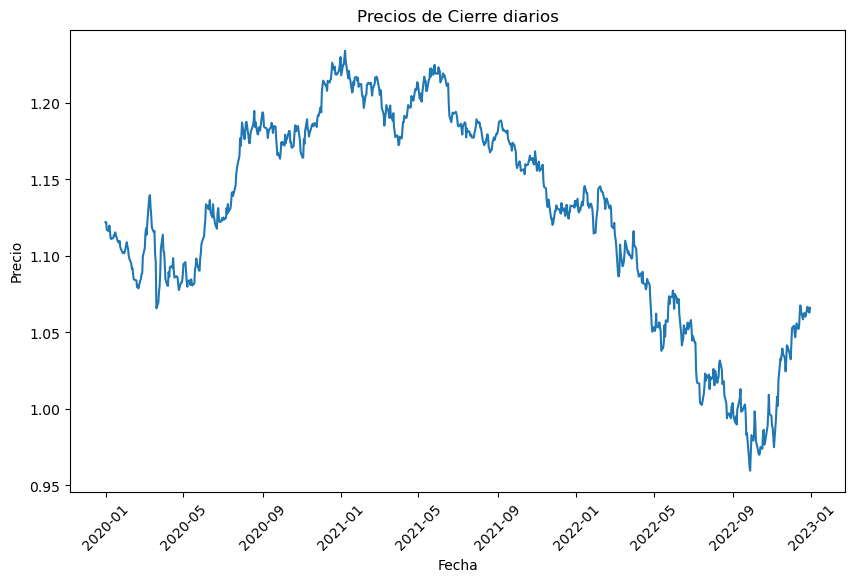

In [84]:
import yfinance as yf # para obtener datos
import pandas as pd # para manipular datos y dataframes
import seaborn as sns
import matplotlib.pyplot as plt # para graficar

# Dado que utilizamos Yahoo Finance, hay que buscar el ticker que usan
ticker = 'EURUSD%3DX'
# Vamos a bajar datos del 2020 al 2023
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Nos quedamos solo con los datos de cierre
px_close = data['Close']

# Definmos el tamaño de la gráfica
plt.figure(figsize=(10,6))

# Graficamos usando seaborn
sns.lineplot(data=px_close)

# Agregamos titulos
plt.title('Precios de Cierre diarios')
plt.xlabel('Fecha')
plt.ylabel('Precio')

# Rotamos el eje x para mejor visualización
plt.xticks(rotation = 45)

# Mostramos la gráfica
plt.show()


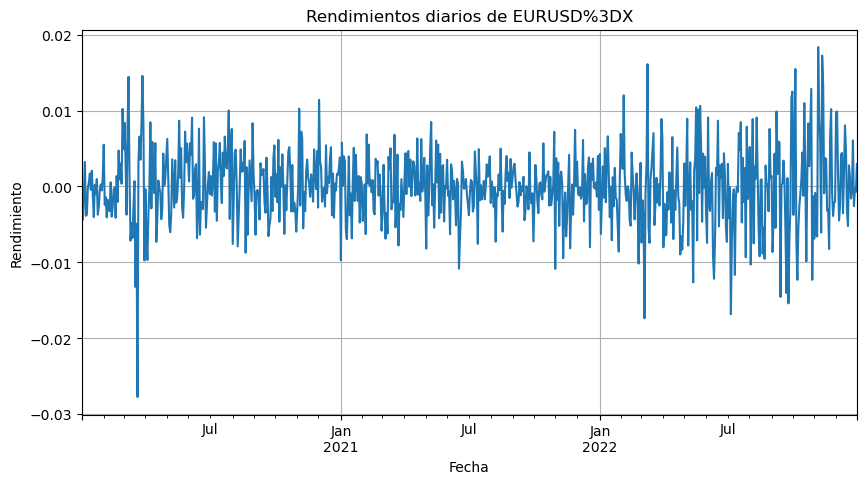

In [85]:
# Calculamos los rendimientos
rendimientos = px_close.pct_change().dropna()

# Graficamos usando matplot
plt.figure(figsize=(10, 5))
rendimientos.plot()
plt.title('Rendimientos diarios de ' + ticker)
plt.xlabel('Fecha')
plt.ylabel('Rendimiento')
plt.grid(True)
plt.show()

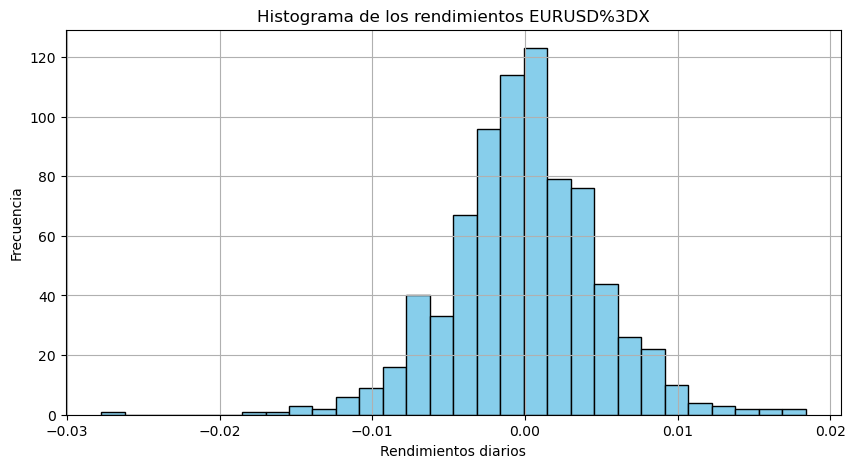

In [86]:
# Podemos graficar también un historgrama
plt.figure(figsize=(10,5))
plt.hist(rendimientos, bins = 30, color = 'skyblue', edgecolor='black')
plt.title('Histograma de los rendimientos ' + ticker)
plt.xlabel('Rendimientos diarios')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Ahora vamos a calcular el VaR y el CVar de los rendimientos:

In [87]:
# Primero estimamos $\mu$:
mu_r = rendimientos.mean()
# Luego sd:
sd_r = rendimientos.std()

# Usamos un intervalo de confianza:
conf = 0.95

# Calculamos Z que corresponde a nuestro nivel de confianza
z_score = np.percentile(rendimientos, 100*(1-conf))

# Calculamos el VaR
VaR = mu_r + z_score * sd_r
print(f"El Valor en Reisgo al {conf * 100:.2f}% de confianza: {VaR: .6f}")

El Valor en Reisgo al 95.00% de confianza: -0.000091


In [88]:
# Usando los mismos datos anteriores, podemos hacerlo más rápido
VaR = rendimientos.quantile(1 - conf)
CVaR = rendimientos[rendimientos <= VaR].mean()

print(f"El Conditional Value at Risk (CVaR) al {conf * 100:.2f}% de confianza: {CVaR:.6f}")

El Conditional Value at Risk (CVaR) al 95.00% de confianza: -0.010799


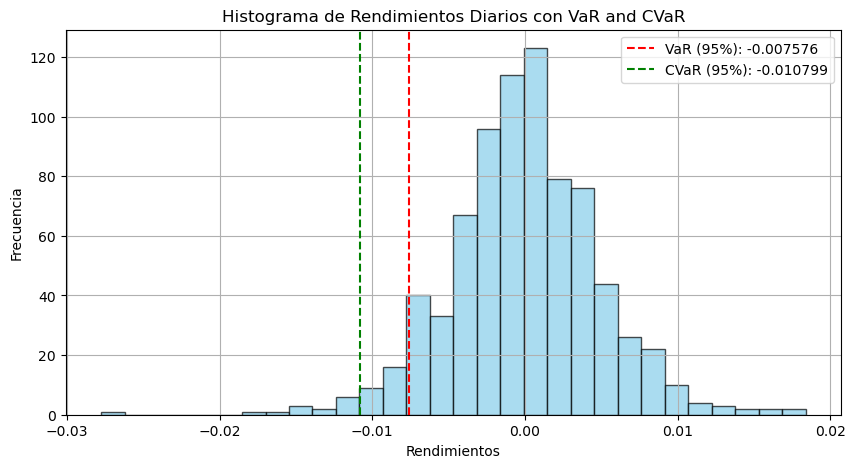

In [89]:
# Ahora vamos a graficar los resultados
plt.figure(figsize=(10, 5))
plt.hist(rendimientos, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Agregar lineas verticales del VaR and CVaR 
plt.axvline(x=VaR, color='red', linestyle='--', label=f'VaR ({conf * 100:.0f}%): {VaR:.6f}')
plt.axvline(x=CVaR, color='green', linestyle='--', label=f'CVaR ({conf * 100:.0f}%): {CVaR:.6f}')

plt.title('Histograma de Rendimientos Diarios con VaR and CVaR')
plt.xlabel('Rendimientos')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

Podemos utilizar método de Monte Carlo para simular el VaR y el CVaR

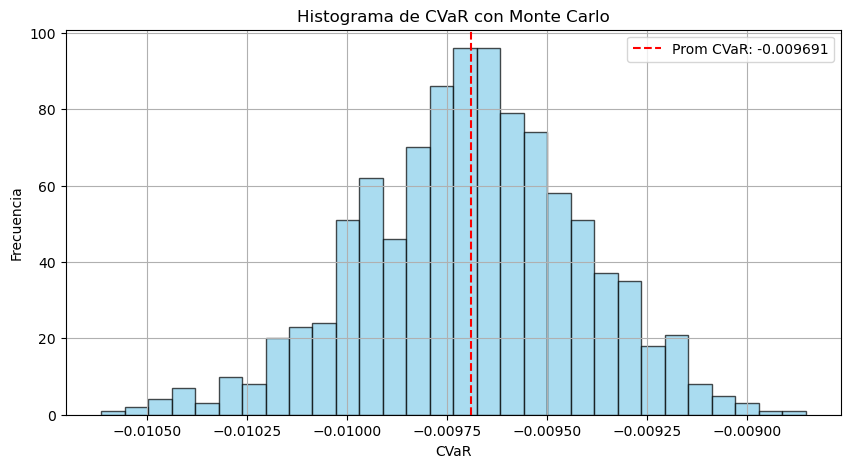

In [90]:
# Definimos los parámetros
num_sim = 1000 # Número de simulaciones
conf = 0.95 # Nivel de confianza
num_dias = len(rendimientos) # Número de días

# Calculamos el VaR usando percentiles para la referencia
VaR = rendimientos.quantile(1-conf)

# Hacemos un array para guardar los resultados del CVaR
CVaR_res = [] # Se inicializa en vacio

# Hacemos un for loop para el Monte Carlo

for _ in range(num_sim):
    # Se generan rendimientos para cada día
    sim_rend = np.random.normal(rendimientos.mean(), rendimientos.std(), num_dias)
    
    # Se calcula el CVaR de cada simulación, recordemos que usamos el VaR de referencia
    CVaR = np.mean(sim_rend[sim_rend <= VaR])
    
    # Guardamos el resultado en el array usando append()
    CVaR_res.append(CVaR)
    
# Graficamos los resultados
# Tamaño del gráfico
plt.figure(figsize=(10,5)) 
# Histograma con 30 bins
plt.hist(CVaR_res, bins = 30, color = 'skyblue', edgecolor='black', alpha=0.7)
# Agregamos una línea vertical con el valor promedio del CVaR
plt.axvline(x=np.mean(CVaR_res), color='red', linestyle='--', label=f'Prom CVaR: {np.mean(CVaR_res):.6f}')
# Agregamos título
plt.title('Histograma de CVaR con Monte Carlo')
# Nombre de los ejes
plt.xlabel('CVaR')
plt.ylabel('Frecuencia')
# Agregamos leyenda (color de la línea vertical y que significa)
plt.legend()
# Agregamos cuadrícula
plt.grid(True)
# Mostramos la gráfica
plt.show()

## Black Scholes y Merton
### Funciones

Ahora vamos a trabajar con funciones y métodos, que son una de las partes más importantes de programación.

En este caso vamos a trabajar con Opciones.

El modelo de Merton nos va a permitir visualizar el riesgo de default de una empresa de la siguiente forma:

- Consideramos que no existen costos de transacción 
- Se sigue la regla de absoluta prioridad

Entonces, consideremos una empresa con valor $V$ que solo tiene un bono $B$ con valor nominal de $K$. 

Si el valor de la empresa $V$ es mayor al del bono $B$, esta lo paga y todos felices, ¿qué pasa si $B > V$?

Primero determinamos que el valor de una acción en tiempo t es $S_{t}$, y este lo definiríamos como:

$$
S_{t} = \max (V_{t} - K, 0)
$$

recordemos de Contabilidad que el Activo = Pasivo + Capital, en este caso la empresa solo tiene un Bono, por lo cual:

$$
B_{t} = V_{t} - S_{t} = V_{t} - \max(V_t - K, 0) = \min(V_t, K)
$$

por lo tanto se puede decir que el valor de la acción (o de la empresa) trae implicito una probabilida de incumplimiento.


Vamos a valuar la acción.


Primero consideramos que no hay dividendos, entonces con la fórmula de Black-Scholes:

$$
S = Call = VN(d_{1}) - Ke^{-rt}N(d_{2})
$$

en este caso $d_{1}$ lo definimos como

$$
d_{1} = \frac{ln(V/Ke^{-rt})}{\sigma\sqrt{\tau}} + \frac{\sigma\sqrt\tau}{2}
$$

y $d_{2}$ sería:

$$
d_{2} = d1 - \sigma\sqrt\tau
$$

donde $\tau = T - t$ es el tiempo a la expiración, $r$ es la tasa libre de riesgo, y $\sigma$ la volatilidad de la acción. $N$ es la función de distribución acumulada. $d_{2}$ se puede interpretar como la probabilidad de que se ejerza la opción.

### Ejercicio

Se tiene una empresa con valor $V = \$100$, con un $\sigma_{v} = 20\%$, $\tau = 1$ año, la tasa libre de riesgo es $r = 10\%$ y un apalancamiento de $x = 0.9$.

Recordemos que el apalancamiento es la deuda/valor de la empresa, por lo tanto

$$
x = \frac{Ke^{-rt}}{V}
$$

a. ¿Cuánto vale S?

Recordemos que S se define como:

$$
S = Call = VN(d_{1}) - Ke^{-rt}N(d_{2})
$$

Primero hagamos $d_{1}$:

$$
d_{1} = \frac{ln(V/Ke^{-rt})}{\sigma\sqrt{\tau}} + \frac{\sigma\sqrt\tau}{2}
$$


In [91]:
from scipy.stats import norm
import numpy as np

In [92]:
def d_1(V, K, r, tau, sigma):
    return np.log(V/(K*np.exp(-r*tau)))/(sigma * np.sqrt(tau)) + (sigma * np.sqrt(tau))/2


ahora $d_2$

In [93]:
def d_2(d1, sigma, tau):
    return d1 - sigma*np.sqrt(tau)

ahora $S$:

In [94]:
def s_call(V, d1, d2, K, r, tau):
    return V*norm.cdf(d1) - K * np.exp(-r*tau)*norm.cdf(d2)

Ahora obtenemos los valores usando nuestras funciones, primero definimos variables:

In [95]:
V = 100
sigma = 0.20
tau = 1
r = 0.10
x = 0.9

¿Cómo obtenemos K? recordemos qeu si x es el apalancamiento (deuda/capital), entonces K la obtenemos:

In [96]:
K = 0.9 * V

y consideranco la tasa libre de riesgo

In [97]:
K = K * np.exp(r*tau)

ahora empezamos a usar nuestras funciones:

In [98]:
d1 = d_1(V, K, r, tau, sigma)
print(d1)

0.6268025782891317


luego d2

In [99]:
d2 = d_2(d1, sigma, tau)
print(d2)

0.42680257828913165


ahora S Call:

In [100]:
valor_s = s_call(V, d1, d2, K, r, tau)
print(valor_s)

13.589108116054803


Recordemos de contabilidad que Activo = Pasivo + Capital, por lo tanto el valor del Bono es:

In [101]:
B = V - valor_s
print(B)

86.4108918839452


si el bono originalmente esta en:

In [102]:
print(K)

99.46538262680829


El rendimiento considerando la tasa libre de riesgo es de:

In [103]:
print(np.log(K/B)/tau - r)

0.040695938993998926


### Loss Given Defautl

Estimated Loss Given Default (LGD): 59953.40787844072


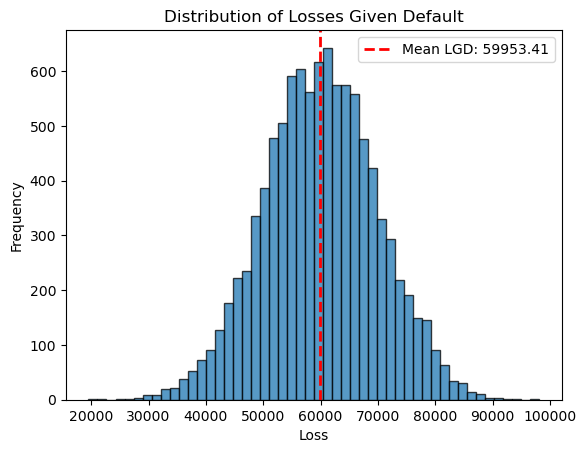

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
num_simulations = 10000  # Number of Monte Carlo simulations
exposure_at_default = 100000  # EAD in monetary units (e.g., dollars)
recovery_rate_mean = 0.4  # Mean recovery rate (40%)
recovery_rate_stddev = 0.1  # Standard deviation of recovery rate

# Generate random recovery rates using a normal distribution
recovery_rates = np.random.normal(recovery_rate_mean, recovery_rate_stddev, num_simulations)

# Ensure recovery rates are between 0 and 1
recovery_rates = np.clip(recovery_rates, 0, 1)

# Calculate losses for each simulation
losses = exposure_at_default * (1 - recovery_rates)

# Calculate the average loss given default (LGD)
lgd = np.mean(losses)

print(f"Estimated Loss Given Default (LGD): {lgd}")

# Plot the distribution of losses
plt.hist(losses, bins=50, alpha=0.75, edgecolor='black')

# Add a vertical line for the mean LGD
plt.axvline(lgd, color='red', linestyle='dashed', linewidth=2, label=f'Mean LGD: {lgd:.2f}')

# Add titles and labels
plt.title('Distribution of Losses Given Default')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()

### Black Scholes con Monte Carlo

Ahora vamos a calcular el precio de una opción utilizando Black Scholes y el método de Monte Carlo.

Recordemos que tenemos que definir los parámetros y crear una función.

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

S = 100 # Precio spot
K = 110 # Precio strike
T = 1/2 # Tiempo al vencimiento
r = 0.10 # Tasa libre de riesgo
q = 0.05  # Dividendo anual
sigma = 0.10 # Volatilidad anual %

# Definimos la función de BS para Call
def black_scholes_call(S, K, T, r, q, sigma):
    """ Función para el cálculo de precio de opción Call con Black Scholes

    Argumentos:
        S (float): Precio spot
        K (float): Precio strike
        T (float): Time to maturity en años
        r (float): Tasa libre de riesgo
        q (float): Tasa de dividendo
        sigma (float): Volatilidad %
    
    Return: Precio de Call

    """
    
    d1 = (np.log(S/K) + (r-q+sigma**2/2)*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call = S * np.exp(-q*T)*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    return call

bs_call = black_scholes_call(S, K, T, r, q, sigma)
print("Precio Call usando BS:", bs_call)

Precio Call usando BS: 0.6013510663825024


Ahora vamos a hacer el Put:

In [106]:
# Definimos la función de BS para Put
def black_scholes_put(S, K, T, r, q, sigma):
    """Función para el cálculo de precio de una opción Put con Black Scholes

    Args:
        S (float): Precio spot
        K (float): Precio strike
        T (float): Time to maturity en años
        r (float): Tasa libre de riesgo
        q (float): Tasa de dividendo
        sigma (float): Volatilidad en %
    """
    
    d1 = (np.log(S/K) + (r-q+sigma**2/2)*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put = K*np.exp(-r*T)*norm.cdf(-d2) - S * norm.cdf(-d1)
    
    return put

bs_put = black_scholes_put(S, K, T, r, q, sigma)
print("Precio Put usando BS:", bs_put)

Precio Put usando BS: 5.65331748314054


In [107]:
S = 100 # Precio spot
K = 110 # Precio strike
T = 1/2 # Tiempo al vencimiento
r = 0.10 # Tasa libre de riesgo
q = 0.05  # Dividendo anual
sigma = 0.10 # Volatilidad anual %

bs_call = black_scholes_call(S, K, T, r, q, sigma)
bs_put = black_scholes_put(S, K, T, r, q, sigma)
print("Precio Call usando BS:", bs_call)
print("Precio Put usando BS:", bs_put)

Precio Call usando BS: 0.6013510663825024
Precio Put usando BS: 5.65331748314054


## Cálculo del precio de una opción usando árboles binomiales

Asset Prices Tree:
[[100.         111.54700538 124.4273441  138.79497622]
 [  0.          88.45299462  98.66666667 110.05971198]
 [  0.           0.          78.23932257  87.27362135]
 [  0.           0.           0.          69.20502378]]
Option Prices Tree:
[[10.95802385 17.07209299 26.08019872 38.79497622]
 [ 0.          3.19208881  5.66670045 10.05971198]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


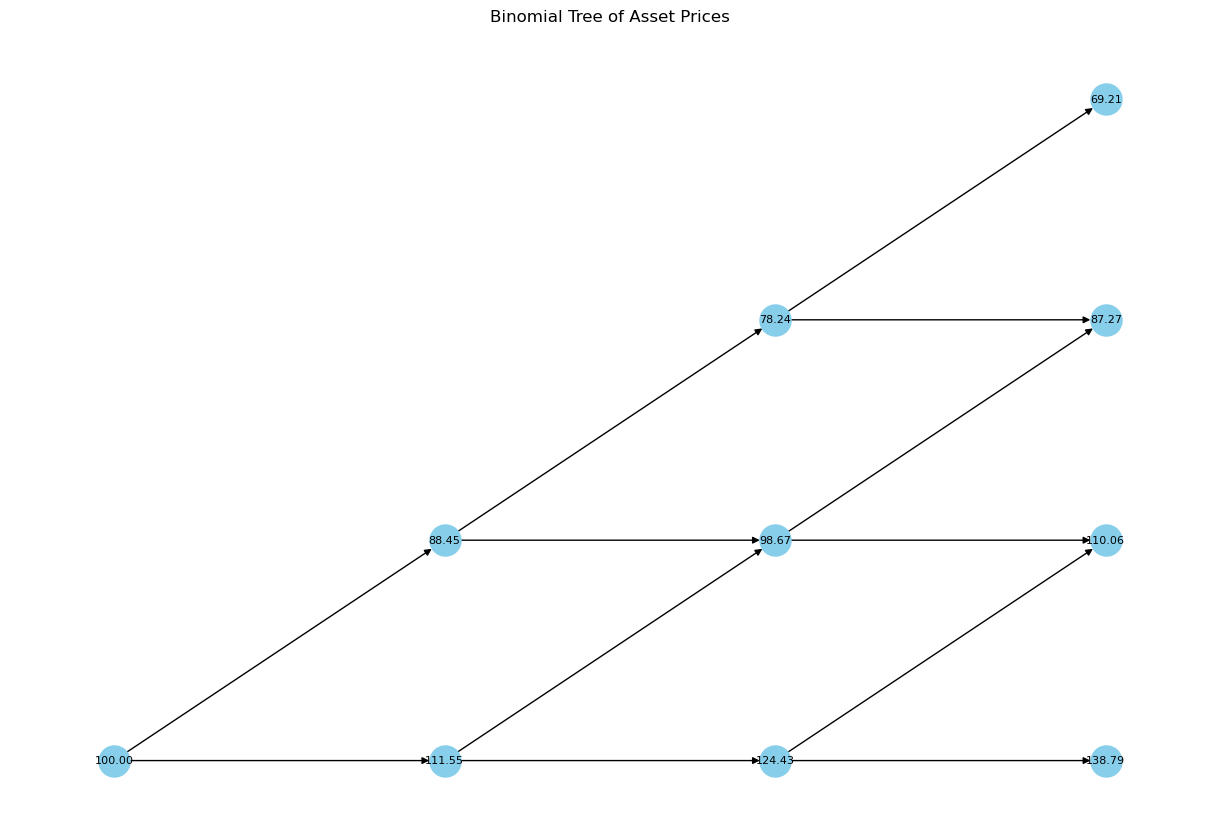

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Parameters
S0 = 100  # Initial stock price
K = 100   # Strike price
T = 1.0   # Time to maturity (in years)
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility
N = 3     # Number of time steps

# Calculate the derived parameters
dt = T / N  # Time step
u = 1 + sigma * (dt ** 0.5)  # Up factor
d = 1 - sigma * (dt ** 0.5)  # Down factor
p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

# Initialize asset price tree with zeros
asset_prices = np.zeros((N + 1, N + 1))
asset_prices[0, 0] = S0

# Fill in the asset price tree
for i in range(1, N + 1):
    for j in range(i + 1):
        asset_prices[j, i] = S0 * (u ** (i - j)) * (d ** j)

print("Asset Prices Tree:")
print(asset_prices)

# Initialize option price tree with zeros
option_prices = np.zeros((N + 1, N + 1))

# Calculate the option values at maturity
for j in range(N + 1):
    option_prices[j, N] = max(0, asset_prices[j, N] - K)  # Call option

# Work backward through the tree
for i in range(N - 1, -1, -1):
    for j in range(i + 1):
        option_prices[j, i] = np.exp(-r * dt) * (p * option_prices[j, i + 1] + (1 - p) * option_prices[j + 1, i + 1])

print("Option Prices Tree:")
print(option_prices)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for i in range(N + 1):
    for j in range(i + 1):
        G.add_node((i, j), pos=(i, j))
        if i < N:
            G.add_edge((i, j), (i + 1, j))
            G.add_edge((i, j), (i + 1, j + 1))

# Get positions
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=False, node_size=500, node_color='skyblue', font_size=10, font_color='black')
nx.draw_networkx_labels(G,
                        pos, 
                        labels={(i, j): f'{asset_prices[j, i]:.2f}' for i in range(N + 1) for j in range(i + 1) if i < N+1},
                        font_size=8)
plt.title('Binomial Tree of Asset Prices')
plt.show()

## Ejercicio ChatGPT

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Descargar datos históricos del tipo de cambio EUR/USD
data = yf.download('MXNUSD=X', start='2019-01-01', end='2024-01-01')

# Mostrar los primeros datos para ver la estructura
print(data.head())


[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2019-01-01  0.050932  0.050935  0.050917  0.050933   0.050933       0
2019-01-02  0.050944  0.051139  0.050721  0.050947   0.050947       0
2019-01-03  0.050985  0.051138  0.050848  0.051000   0.051000       0
2019-01-04  0.050979  0.051452  0.050864  0.051009   0.051009       0
2019-01-07  0.051597  0.051858  0.051366  0.051595   0.051595       0


In [112]:
# Calcular los rendimientos diarios
data['Return'] = data['Close'].pct_change()
print(data.head())

                Open      High       Low     Close  Adj Close  Volume  \
Date                                                                    
2019-01-01  0.050932  0.050935  0.050917  0.050933   0.050933       0   
2019-01-02  0.050944  0.051139  0.050721  0.050947   0.050947       0   
2019-01-03  0.050985  0.051138  0.050848  0.051000   0.051000       0   
2019-01-04  0.050979  0.051452  0.050864  0.051009   0.051009       0   
2019-01-07  0.051597  0.051858  0.051366  0.051595   0.051595       0   

              Return  
Date                  
2019-01-01       NaN  
2019-01-02  0.000275  
2019-01-03  0.001051  
2019-01-04  0.000163  
2019-01-07  0.011485  


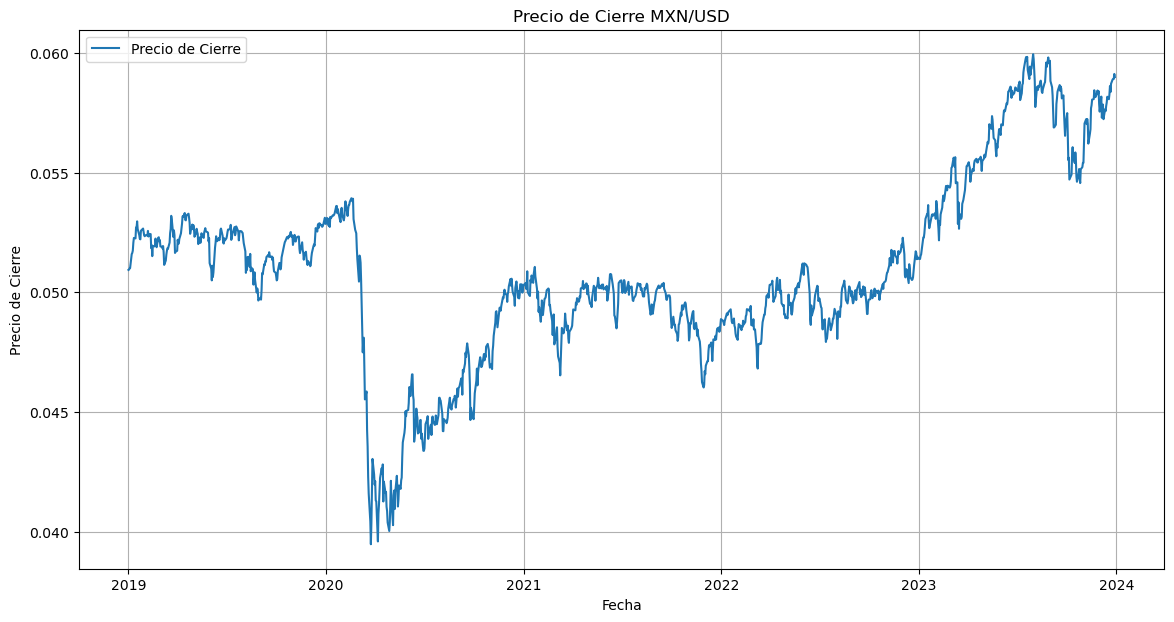

In [113]:
# Graficar los precios de cierre
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Precio de Cierre')
plt.title('Precio de Cierre MXN/USD')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.grid(True)
plt.show()


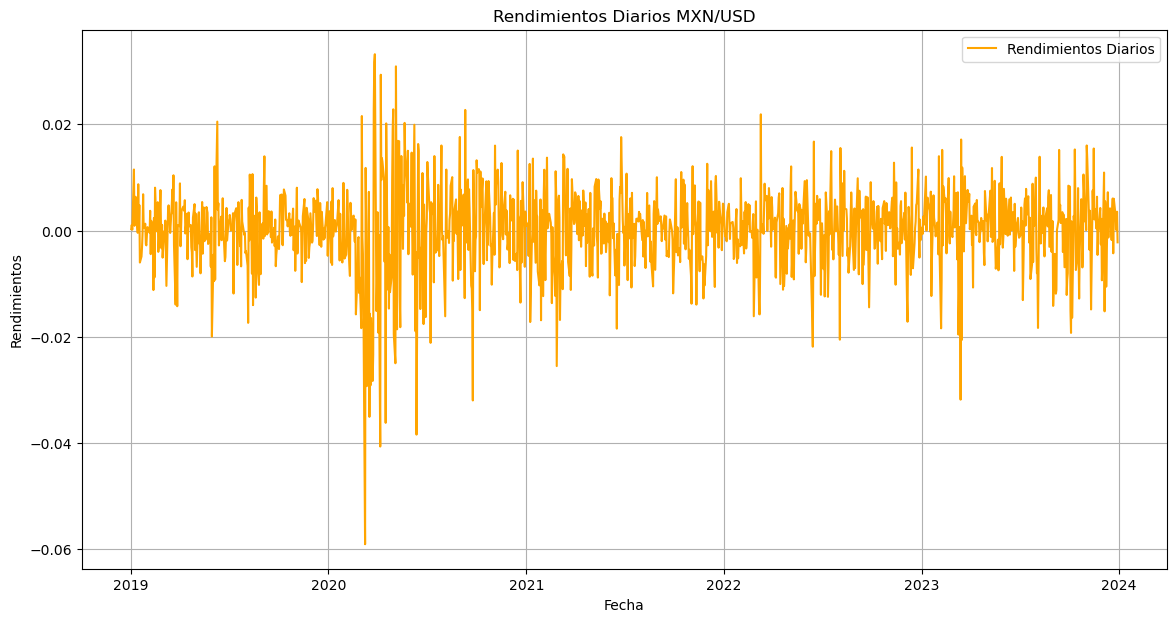

In [114]:
# Graficar los rendimientos diarios
plt.figure(figsize=(14, 7))
plt.plot(data['Return'], label='Rendimientos Diarios', color='orange')
plt.title('Rendimientos Diarios MXN/USD')
plt.xlabel('Fecha')
plt.ylabel('Rendimientos')
plt.legend()
plt.grid(True)
plt.show()


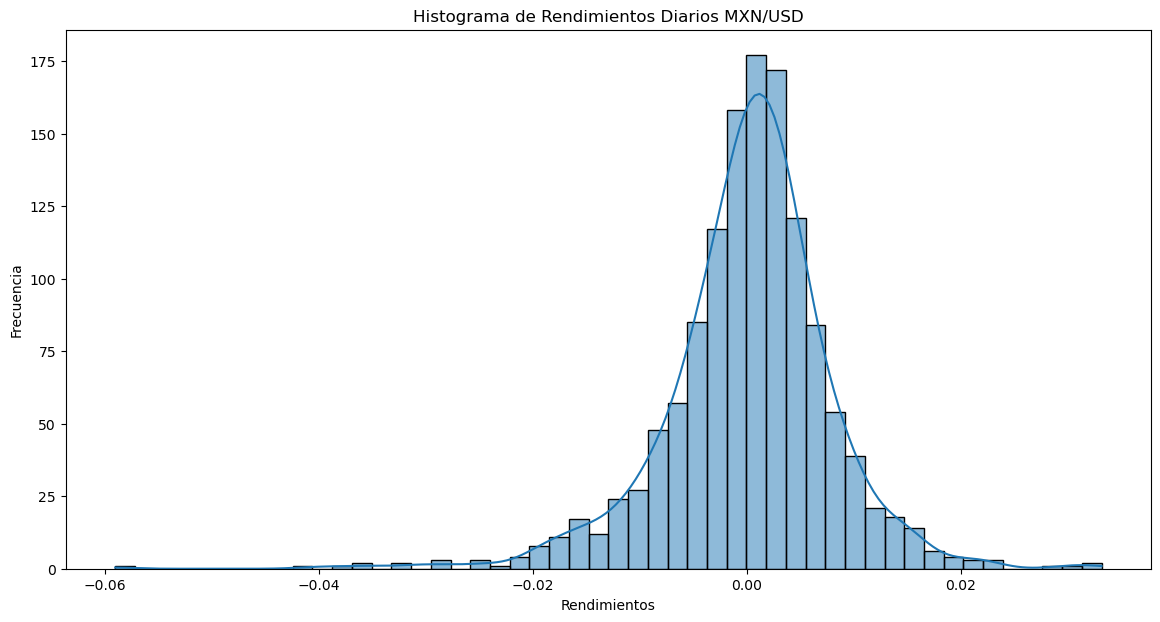

In [115]:
# Histograma de los rendimientos
plt.figure(figsize=(14, 7))
sns.histplot(data['Return'].dropna(), bins=50, kde=True)
plt.title('Histograma de Rendimientos Diarios MXN/USD')
plt.xlabel('Rendimientos')
plt.ylabel('Frecuencia')
plt.show()


VaR al 95.0% de confianza: -1.31%


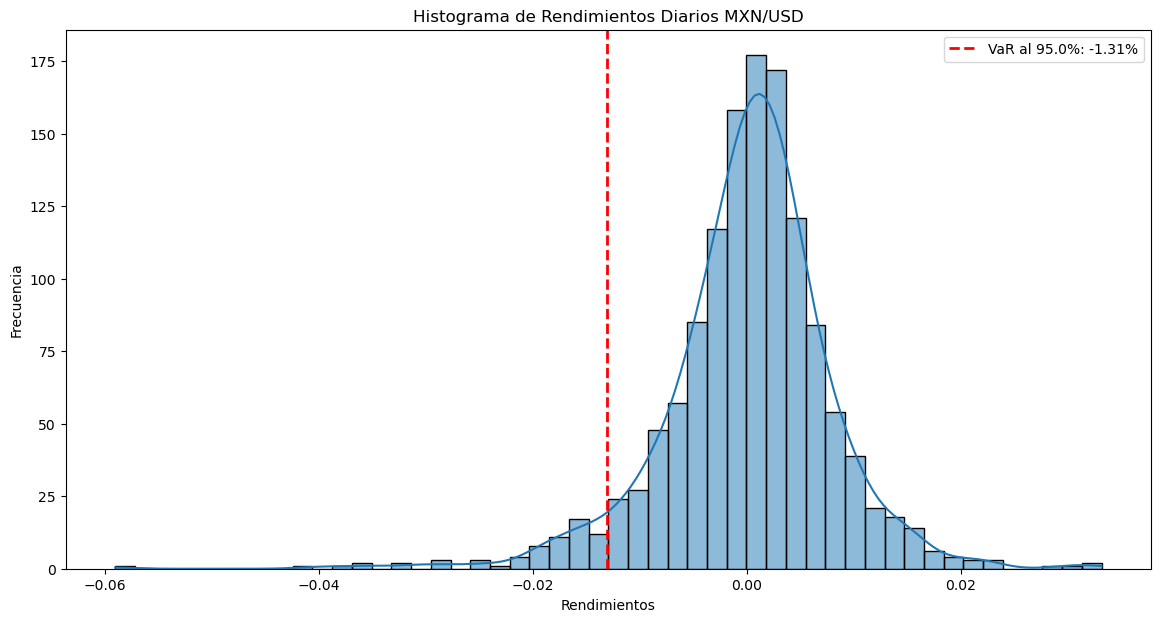

In [116]:
# Calcular el Valor en Riesgo (VaR) al 95% de confianza
confidence_level = 0.95
VaR = np.percentile(data['Return'].dropna(), (1 - confidence_level) * 100)
print(f'VaR al {confidence_level * 100}% de confianza: {VaR:.2%}')

# Histograma de los rendimientos
plt.figure(figsize=(14, 7))
sns.histplot(data['Return'].dropna(), bins=50, kde=True)
plt.axvline(VaR, color='red', linestyle='--', linewidth=2, label=f'VaR al {confidence_level * 100}%: {VaR:.2%}')
plt.title('Histograma de Rendimientos Diarios MXN/USD')
plt.xlabel('Rendimientos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


VaR al 95.0% de confianza: -1.31%
CVaR al 95.0% de confianza: -2.00%
VaR en términos monetarios: $-13,073.64
CVaR en términos monetarios: $-20,017.19


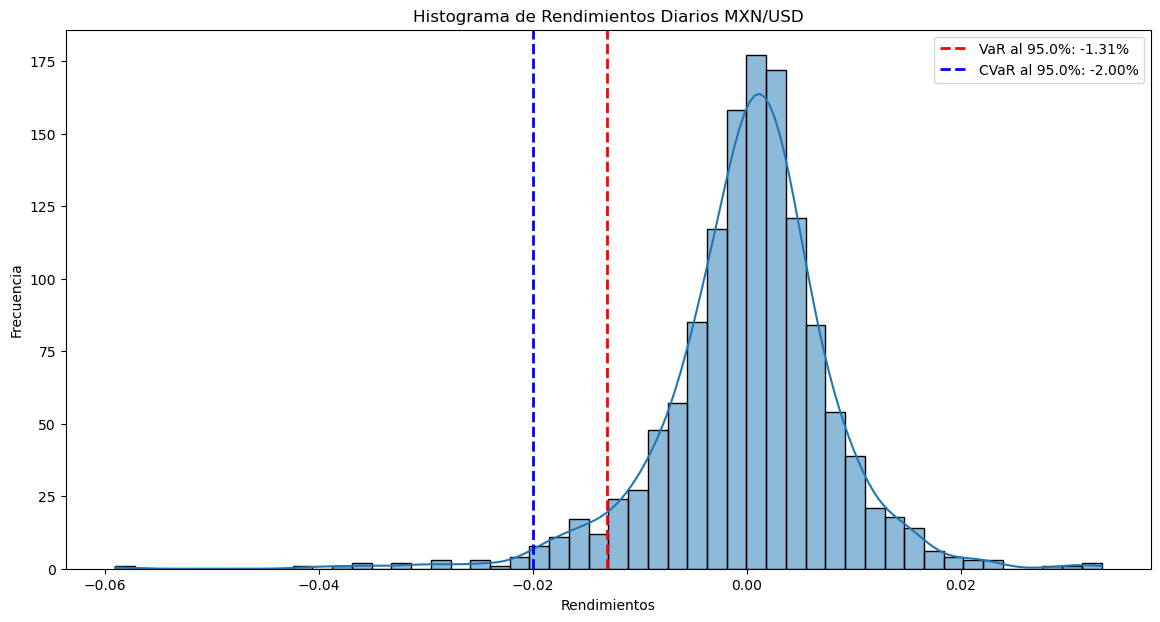

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Calcular el VaR al 95% de confianza
confidence_level = 0.95
VaR = np.percentile(data['Return'].dropna(), (1 - confidence_level) * 100)
print(f'VaR al {confidence_level * 100}% de confianza: {VaR:.2%}')

# Calcular el CVaR (Expected Shortfall)
returns_below_VaR = data['Return'][data['Return'] <= VaR]
CVaR = returns_below_VaR.mean()
print(f'CVaR al {confidence_level * 100}% de confianza: {CVaR:.2%}')

# Valor de la inversión inicial
initial_investment = 1000000  # 1 millón de USD, por ejemplo

# VaR y CVaR en términos monetarios
VaR_monetary = initial_investment * VaR
CVaR_monetary = initial_investment * CVaR

print(f'VaR en términos monetarios: ${VaR_monetary:,.2f}')
print(f'CVaR en términos monetarios: ${CVaR_monetary:,.2f}')


# Histograma de los rendimientos con VaR y CVaR
plt.figure(figsize=(14, 7))
sns.histplot(data['Return'].dropna(), bins=50, kde=True)
plt.axvline(VaR, color='red', linestyle='--', linewidth=2, label=f'VaR al {confidence_level * 100}%: {VaR:.2%}')
plt.axvline(CVaR, color='blue', linestyle='--', linewidth=2, label=f'CVaR al {confidence_level * 100}%: {CVaR:.2%}')
plt.title('Histograma de Rendimientos Diarios MXN/USD')
plt.xlabel('Rendimientos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


## Hedge ratio usando Monte Carlo y OLS

In [143]:
import yfinance as yf
import pandas as pd # Para manipulación de tablas
import numpy as np # Para operaciones numéricas
from datetime import datetime, timedelta # Para manipulación de fechas

# Especificamos los tickers de USD/MXN y Futuros de USD/MXN para bajar de Yahoo Finance
usd_mxn_ticker = 'MXN=X'
futures_ticker = '6M=F'

# Bajamos los datos desde el 1o de enero del 2022 al 31 de diciembre del 2023
usd_mxn_data = yf.download(usd_mxn_ticker, start='2022-01-01', end='2023-12-31')
futures_data = yf.download(futures_ticker, start='2022-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [165]:
# Revisamos los data frames que se bajaron
#usd_mxn_data.tail()
futures_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
497,2023-12-22,0.05882,0.05882,0.05868,0.05868,0.05868,16
498,2023-12-26,0.05875,0.05887,0.05875,0.05887,0.05887,3
499,2023-12-27,0.05886,0.05897,0.05886,0.05897,0.05897,2
500,2023-12-28,0.05893,0.05893,0.05893,0.05893,0.05893,0
501,2023-12-29,0.05890,0.05890,0.05887,0.05887,0.05887,1


In [145]:
# Para poder hacer el análisis de hedge ratio primero hay que hacer varios ajustes a los datos que bajamos
# Uno de ellos es asegurarnos que las fechas coincidan, para lo cual primero hacemos un 'reset' del índice

# De esta forma hacemos que la columna de Fecha se convierta en el índice
usd_mxn_data.reset_index(inplace=True)
futures_data.reset_index(inplace=True)

# Ahora alineamos los datos respecto a la fecha y nombramos las columas con respecto al data frame que corresponden
merged_df = pd.merge(usd_mxn_data[['Date', 'Close']], futures_data[['Date', 'Close']], on='Date', suffixes=('_usd_mxn', '_futures'))

# Solo nos interesa el último año de datos
end_date = merged_df['Date'].max()
start_date = end_date - timedelta(days=365)
filtered_df = merged_df[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)]

# Ahora nos aseguramos que sean del mismo tamaño las series
usd_mxn_close = filtered_df['Close_usd_mxn'].values
futures_close = filtered_df['Close_futures'].values

# Calculamos los rendimientos diarios
usd_mxn_returns = np.diff(usd_mxn_close) / usd_mxn_close[:-1]
futures_returns = np.diff(futures_close) / futures_close[:-1]

# Nos aseguramos nuevamente que tengan el mismo tamaño
min_length = min(len(usd_mxn_returns), len(futures_returns))
usd_mxn_returns = usd_mxn_returns[:min_length]
futures_returns = futures_returns[:min_length]

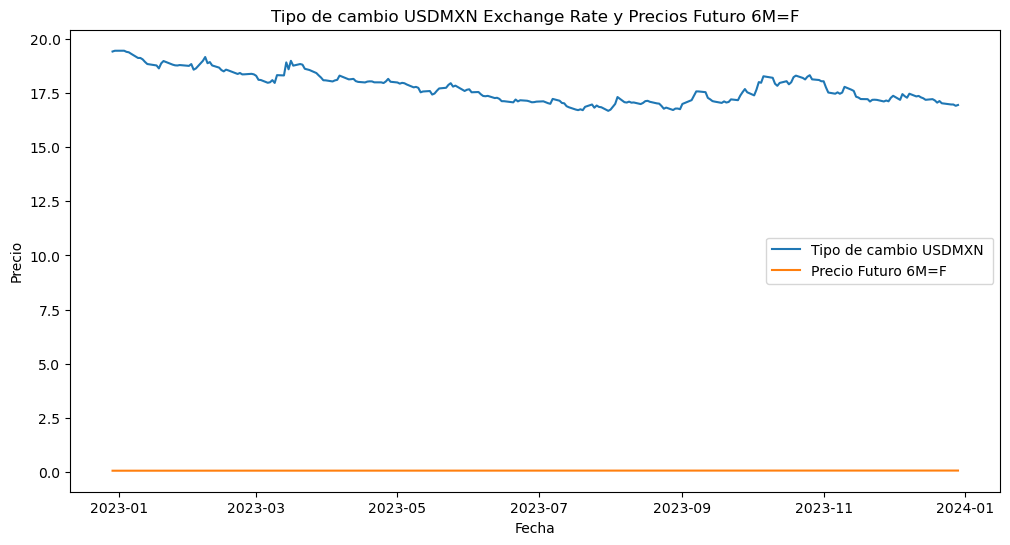

In [146]:
# Podemos graficar los datos que bajamos y asegurarnos que están del mismo tamaño
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Date'], filtered_df['Close_usd_mxn'], label='Tipo de cambio USDMXN ')
plt.plot(filtered_df['Date'], filtered_df['Close_futures'], label='Precio Futuro 6M=F')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Tipo de cambio USDMXN Exchange Rate y Precios Futuro 6M=F')
plt.legend()
plt.show()

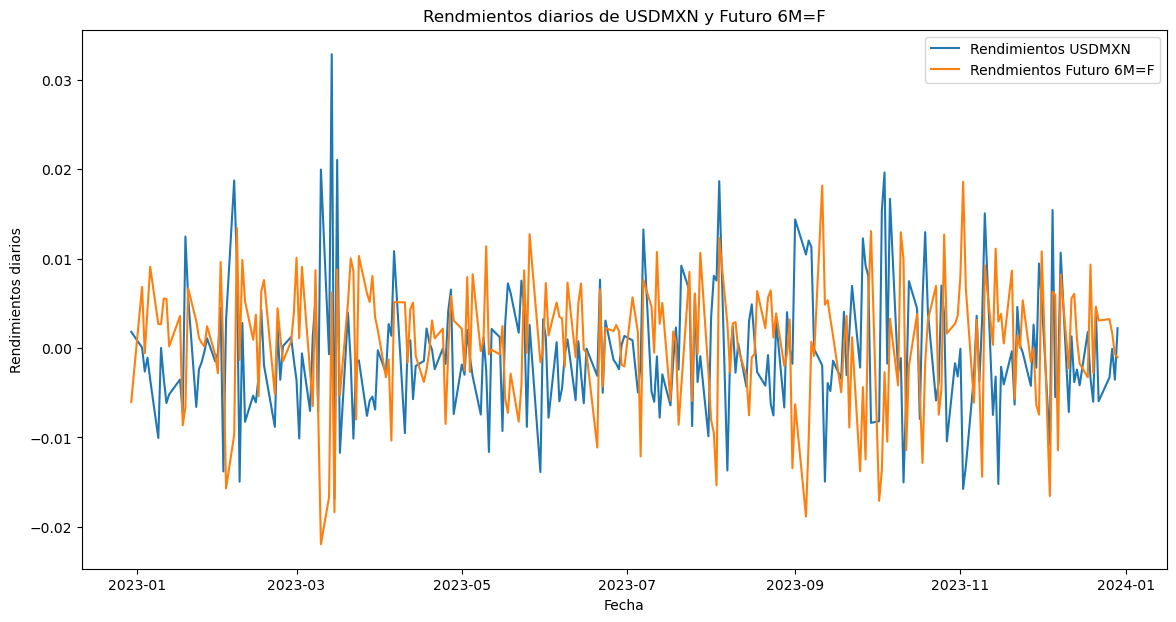

In [147]:
# Ahora vamos a simular con los datos que tenemos,
# los posibles caminos que puede tomar el instrumento que nos interesa

# Primero sacamos el rendimiento promedio y la desviación estándar
usdmxn_mean_return = usd_mxn_returns.mean()
usdmxn_std_return = usd_mxn_returns.std()

# Graficamos los rendimientos
return_dates = filtered_df['Date'][1:len(usd_mxn_returns) + 1]

plt.figure(figsize=(14, 7))
plt.plot(return_dates, usd_mxn_returns, label='Rendimientos USDMXN')
plt.plot(return_dates, futures_returns, label='Rendmientos Futuro 6M=F')
plt.xlabel('Fecha')
plt.ylabel('Rendimientos diarios')
plt.title('Rendmientos diarios de USDMXN y Futuro 6M=F')
plt.legend()
plt.show()

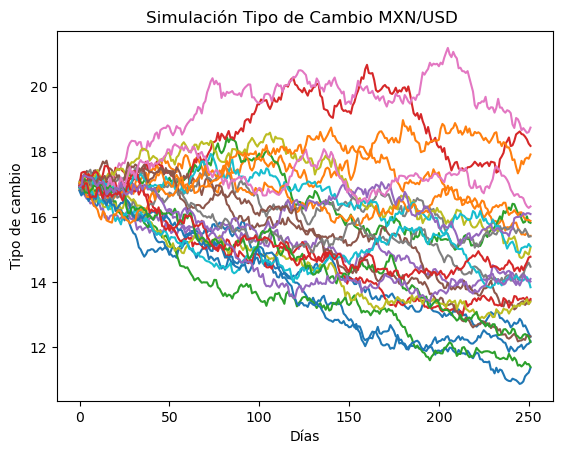

In [149]:
# Elegimos el número de simulaciones y "pasos" o días
num_simulations = 1000
num_days = 252

# Generamos un vector en 0 para poder guardar los días y las simulaciones
simulated_paths = np.zeros((num_days, num_simulations))

# Hacemos un for loop para generar las simulaciones
for i in range(num_simulations):
    simulated_returns = np.random.normal(usdmxn_mean_return, usdmxn_std_return, num_days)
    simulated_paths[:, i] = usd_mxn_close[-1] * (1 + simulated_returns).cumprod()

# Graficamoss
plt.plot(simulated_paths[:, :25]) # Aquí podemos elegir la cantidad de simulaciones que podemos mostrar
plt.title('Simulación Tipo de Cambio MXN/USD ')
plt.xlabel('Días')
plt.ylabel('Tipo de cambio')
plt.show()

In [150]:
# Ahora vamos a calular el Hedge ratio

# En este caso ya tenemos los rendimientos del futuro, así que vamos a estimar la varianza
variance_futures = np.var(futures_returns)

# Así como la covarianza entre el tipo de cambio y el futuro de USDMXN,
# Recordemos que habíamos hecho del mismo tamaño las series de tiempo
# Esto nos sirve para no tener problemas a la hora de calcular la Covarianza

covariance = np.cov(usd_mxn_returns, futures_returns)[0, 1]

# Calculamos el hedge ratio en %
hedge_ratio = covariance / variance_futures

print(f'Hedge Ratio: {hedge_ratio}')

Hedge Ratio: -0.055816903102240516


In [151]:
# Ahora en términos monetarios
# Como no tenemos una referencia de cuánto dinero está en juego, nos basamos en una exposición de $1,000,000

total_exposure = 1_000_000  # $1,000,000 exposure in MXN/USD
hedge_value = hedge_ratio * total_exposure
print(f'Hedge ratio en términos monetarios: ${hedge_value:,.2f}')

Hedge ratio en términos monetarios: $-55,816.90


Ahora vamos a hacerlo de una manera diferente, y revisando que tal funciona con backtesting

In [157]:
# Cargamos una librería para generar regresiones lineales
import statsmodels.api as sm

# Retomamos los rendimientos que bajamos en un inicio
# y generamos una regresión lineal
X = sm.add_constant(futures_returns)
model = sm.OLS(usd_mxn_returns, X)
resultados = model.fit()

print(str(resultados.summary()))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7277
Date:                Wed, 29 May 2024   Prob (F-statistic):              0.394
Time:                        13:09:12   Log-Likelihood:                 889.15
No. Observations:                 252   AIC:                            -1774.
Df Residuals:                     250   BIC:                            -1767.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -1.073      0.2

De los resultados extraemos la pendiente, ¿notan algo respecto a lo que habiamos sacado de manera manual?

In [158]:
# De los resultados extraemos la pendiente, que es equivalente al hedge ratio
hedge_ratio_ols = resultados.params[1]
print("Hedge ratio OLS:", hedge_ratio_ols)

Hedge ratio OLS: -0.055595407455009384


Vemos que es muy similar a nuestro resultado anterior. 
Ahora vamos a llevar a cabo las posiciones que necesitamos, recordemos que estamos jugando con 1000000.

In [135]:
posicion_larga = 1000000
posicion_corta = -hedge_ratio_ols * posicion_larga
print("Tamaño posición larga:", posicion_larga)
print("Tamaño posición corta:", posicion_corta)

Tamaño posición larga: 1000000
Tamaño posición corta: 55595.40745500939


Ahora vamos a ver que tan bien funciona esto, para eso requerimos hacer algo que se llama backtesting.

In [136]:
# Primero recordamos que nos basamos en rendimientos y lo hacemos de la siguiente forma
rend_largo = usd_mxn_returns
rend_corto = -hedge_ratio_ols * futures_returns

# Ahora calculamos los rendimientos con la posición cubierta y sin la cobertura
rend_hedge = rend_largo + rend_corto
rend_unhedge = rend_largo

# Finalmente calculamos los rendimientos acumulados
rend_hedge_acum = (1 + rend_hedge).cumprod() * posicion_larga
rend_unhedge_acum = (1 + rend_unhedge).cumprod() * posicion_larga

Podemos visualizar estas posiciones

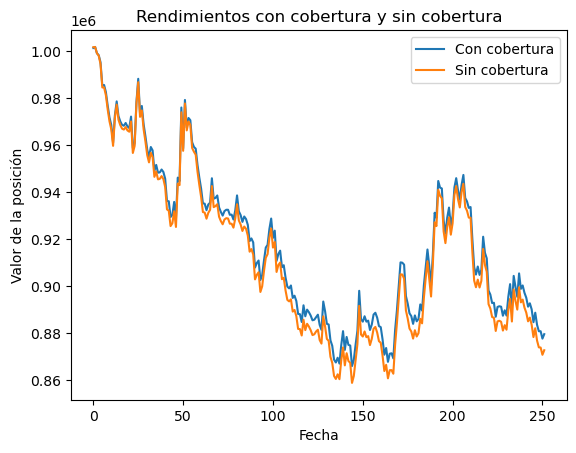

In [137]:
# Primero generamos las propiedades de la gráfica
plt.plot(rend_hedge_acum, label = "Con cobertura")
plt.plot(rend_unhedge_acum, label = "Sin cobertura")
plt.legend()
plt.title("Rendimientos con cobertura y sin cobertura")
plt.xlabel("Fecha")
plt.ylabel("Valor de la posición")
plt.show()

Ahora vamos a revisar nuestros resultados de una manera más concreta

In [141]:
# Eliminamos los valores nulos
#rend_hedge = rend_hedge.dropna()
#rend_unhedge = rend_unhedge.dropna()

# Ahora vamos a calcular métricas comunes
# Promedio de los rendimientos
hedge_mean = np.mean(rend_hedge)
unhedge_mean = np.mean(rend_unhedge)

# Desviación estándar
hedge_std = np.std(rend_hedge)
unhedge_std = np.std(rend_unhedge)

# El Sharpe ratio
hedge_sr = hedge_mean / hedge_std * np.sqrt(252)
unhedge_sr = unhedge_mean / unhedge_std * np.sqrt(252)

Vemos que los rendimientos promedios son similares

In [140]:
# Mostramos los valores
print("Rendimiento promedio con cobertura", hedge_mean)
print("Rendimiento promedio sin cobertura", unhedge_mean)
print("Desviación estándar con cobertura", hedge_std)
print("Desviación estándar sin cobertura", unhedge_std)

Rendimiento promedio con cobertura -0.00048373402829566067
Rendimiento promedio sin cobertura -0.0005146582001814301
Desviación estándar con cobertura 0.007102397041643926
Desviación estándar sin cobertura 0.007112726828676871


Pero en el Sharpe ratio obtenemos que existe un poco menos de riesgo

In [142]:
print("Sharpe ratio con cobertura", hedge_sr)
print("Sharpe ratio sin cobertura", unhedge_sr)

Sharpe ratio con cobertura -1.0811898563814175
Sharpe ratio sin cobertura -1.1486376243695504


¿A qué se debe esto y qué recomendrías?

¿Qué pasa si cambiamos la ventana de tiempo?

##GARCH

Iteration:      1,   Func. Count:      6,   Neg. LLF: 55057048638.48768
Iteration:      2,   Func. Count:     19,   Neg. LLF: 7.913131007442537e+17
Iteration:      3,   Func. Count:     32,   Neg. LLF: 15391626635.793081
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3644.4518016372494
            Iterations: 4
            Function evaluations: 42
            Gradient evaluations: 3
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3644.45
Distribution:                  Normal   AIC:                          -7280.90
Method:            Maximum Likelihood   BIC:                          -7261.11
                                        No. Observations:                 1042
Date:            

/Users/ivandeluna/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.1e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


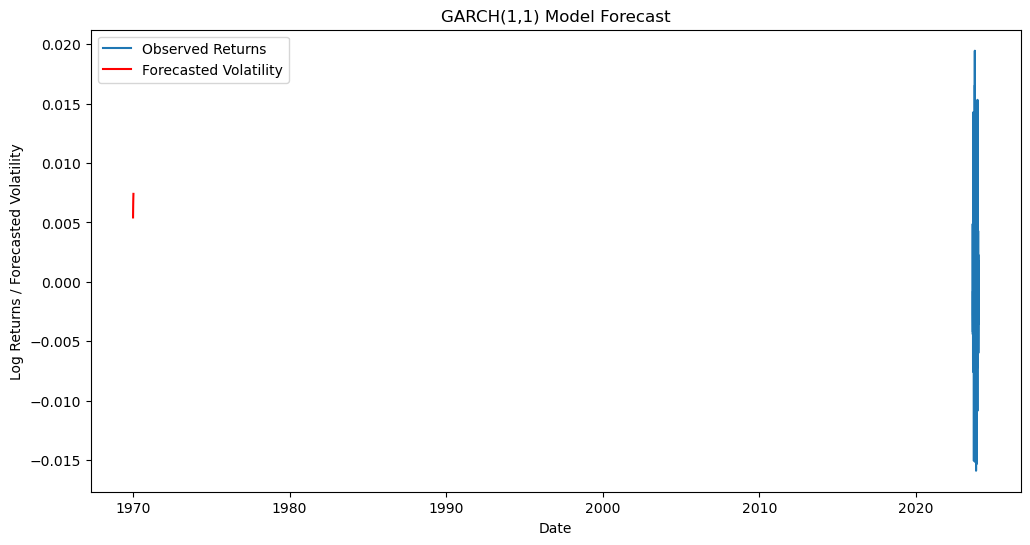

In [172]:
# Fit the GARCH(1,1) model
model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fit = model.fit()
print(garch_fit.summary())

# Generate forecasts
forecasts = garch_fit.forecast(horizon=10)
variance_forecast = forecasts.variance[-1:].T
variance_forecast = np.sqrt(variance_forecast)  # Convert to standard deviation

# Plot the forecasts
plt.figure(figsize=(12, 6))
plt.plot(data.index[-100:], returns[-100:], label='Observed Returns')
plt.plot(range(len(data.index[-1:]), len(data.index[-1:]) + len(variance_forecast)), variance_forecast, color='red', label='Forecasted Volatility')
plt.title('GARCH(1,1) Model Forecast')
plt.xlabel('Date')
plt.ylabel('Log Returns / Forecasted Volatility')
plt.legend()
plt.show()



In [178]:
import yfinance as yf
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt

# Download USD/MXN exchange rate data
ticker = 'MXN=X'
data = yf.download(ticker, start='2020-01-01', end='2024-05-10')

# Calculate daily returns
data['Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
returns = data['Returns'].dropna()


[*********************100%%**********************]  1 of 1 completed


In [179]:
# Fit the GARCH(1,1) model
model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fit = model.fit()
print(garch_fit.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: 72771502491.18376
Iteration:      2,   Func. Count:     19,   Neg. LLF: 25657149964.381897
Iteration:      3,   Func. Count:     33,   Neg. LLF: 2.0122876650101628e+21
Iteration:      4,   Func. Count:     48,   Neg. LLF: 241374281449.81738
Iteration:      5,   Func. Count:     63,   Neg. LLF: 6508772394222156.0
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4002.5930321639025
            Iterations: 6
            Function evaluations: 71
            Gradient evaluations: 5
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4002.59
Distribution:                  Normal   AIC:                          -7997.19
Method:            Maximum L

/Users/ivandeluna/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.75e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


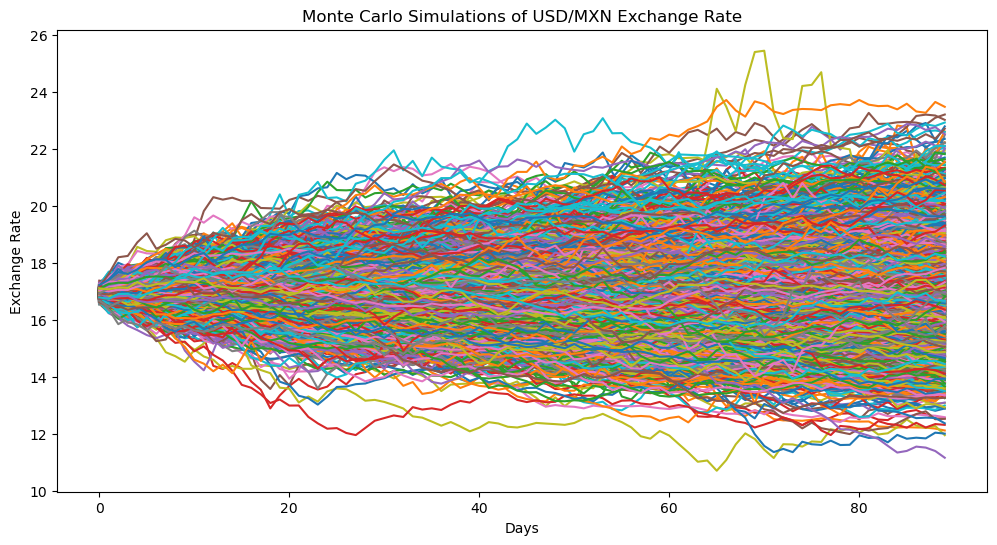

In [180]:
# Parameters for Monte Carlo simulation
num_simulations = 10000
forecast_horizon = 90  # Number of days to forecast

# Get the last observed variance
last_volatility = garch_fit.conditional_volatility[-1]

# Get the model parameters
omega = garch_fit.params['omega']
alpha = garch_fit.params['alpha[1]']
beta = garch_fit.params['beta[1]']

# Simulate future returns
simulated_returns = np.zeros((forecast_horizon, num_simulations))

for i in range(num_simulations):
    # Initialize the volatility for the first forecast period
    sim_vol = last_volatility
    for t in range(forecast_horizon):
        # Generate random shocks
        shock = np.random.normal(0, 1)
        # Simulate next period's return
        simulated_returns[t, i] = sim_vol * shock
        # Update volatility for the next period
        sim_vol = np.sqrt(omega + alpha * simulated_returns[t, i]**2 + beta * sim_vol**2)

# Convert returns to price paths
last_price = data['Adj Close'].iloc[-1]
simulated_prices = np.zeros_like(simulated_returns)
simulated_prices[0] = last_price * np.exp(simulated_returns[0])

for t in range(1, forecast_horizon):
    simulated_prices[t] = simulated_prices[t-1] * np.exp(simulated_returns[t])

# Plot the simulated price paths
plt.figure(figsize=(12, 6))
plt.plot(simulated_prices)
plt.title('Monte Carlo Simulations of USD/MXN Exchange Rate')
plt.xlabel('Days')
plt.ylabel('Exchange Rate')
plt.show()


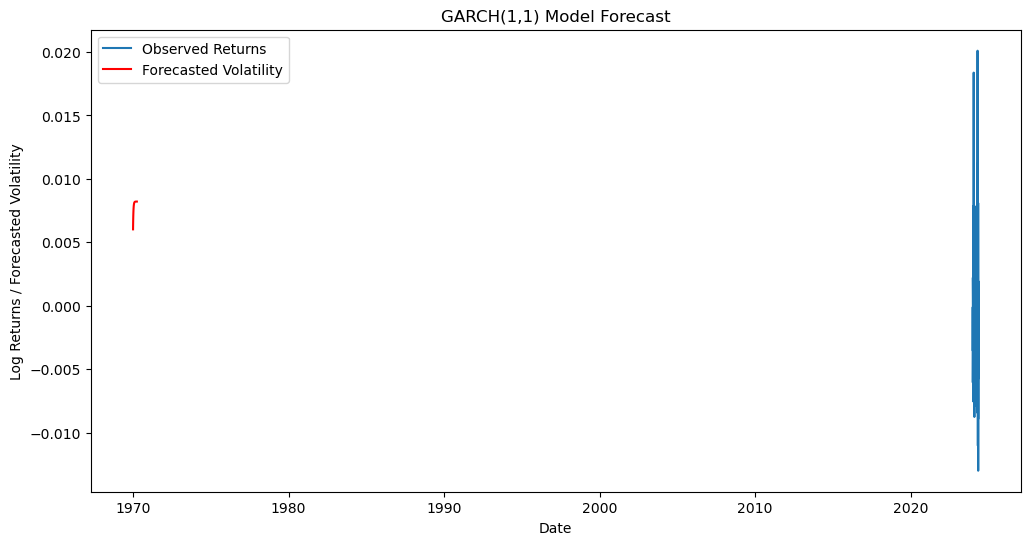

In [181]:
# Generate forecasts
forecasts = garch_fit.forecast(horizon=90)
variance_forecast = forecasts.variance[-1:].T
variance_forecast = np.sqrt(variance_forecast)  # Convert to standard deviation

# Plot the forecasts
plt.figure(figsize=(12, 6))
plt.plot(data.index[-100:], returns[-100:], label='Observed Returns')
plt.plot(range(len(data.index[-1:]), len(data.index[-1:]) + len(variance_forecast)), variance_forecast, color='red', label='Forecasted Volatility')
plt.title('GARCH(1,1) Model Forecast')
plt.xlabel('Date')
plt.ylabel('Log Returns / Forecasted Volatility')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed
Iteration:      1,   Func. Count:      6,   Neg. LLF: 55057048638.48768
Iteration:      2,   Func. Count:     19,   Neg. LLF: 7.913131007442537e+17
Iteration:      3,   Func. Count:     32,   Neg. LLF: 15391626635.793081
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3644.4518016372494
            Iterations: 4
            Function evaluations: 42
            Gradient evaluations: 3
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3644.45
Distribution:                  Normal   AIC:                          -7280.90
Method:            Maximum Likelihood   BIC:                          -7261.11
                           

/Users/ivandeluna/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.1e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


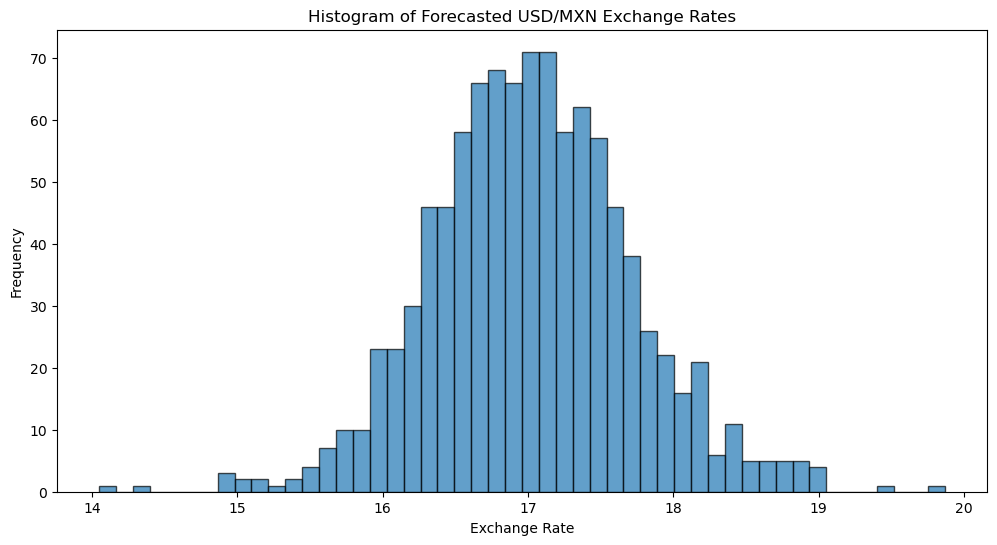

In [183]:
import yfinance as yf
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt

# Download USD/MXN exchange rate data
ticker = 'MXN=X'
data = yf.download(ticker, start='2020-01-01', end='2024-01-01')

# Calculate daily returns
data['Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
returns = data['Returns'].dropna()

# Fit the GARCH(1,1) model
model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fit = model.fit()
print(garch_fit.summary())


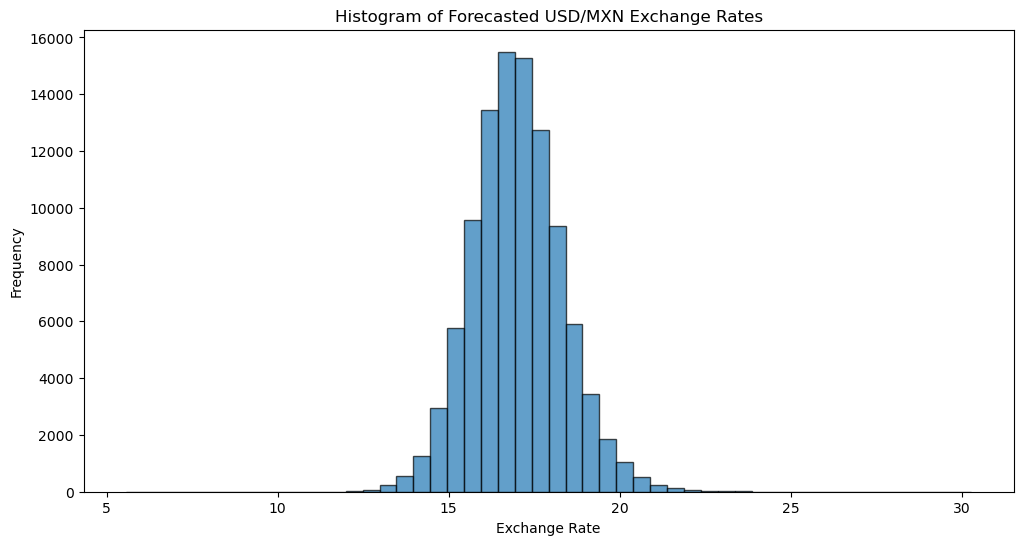

In [184]:

# Parameters for Monte Carlo simulation
num_simulations = 100000
forecast_horizon = 90  # Number of days to forecast

# Get the last observed variance
last_volatility = garch_fit.conditional_volatility[-1]

# Get the model parameters
omega = garch_fit.params['omega']
alpha = garch_fit.params['alpha[1]']
beta = garch_fit.params['beta[1]']

# Simulate future returns
simulated_returns = np.zeros((forecast_horizon, num_simulations))

for i in range(num_simulations):
    # Initialize the volatility for the first forecast period
    sim_vol = last_volatility
    for t in range(forecast_horizon):
        # Generate random shocks
        shock = np.random.normal(0, 1)
        # Simulate next period's return
        simulated_returns[t, i] = sim_vol * shock
        # Update volatility for the next period
        sim_vol = np.sqrt(omega + alpha * simulated_returns[t, i]**2 + beta * sim_vol**2)

# Convert returns to price paths
last_price = data['Adj Close'].iloc[-1]
simulated_prices = np.zeros_like(simulated_returns)
simulated_prices[0] = last_price * np.exp(simulated_returns[0])

for t in range(1, forecast_horizon):
    simulated_prices[t] = simulated_prices[t-1] * np.exp(simulated_returns[t])

# Collect the final simulated prices for each simulation
final_prices = simulated_prices[-1]

# Plot the histogram of the final simulated prices
plt.figure(figsize=(12, 6))
plt.hist(final_prices, bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of Forecasted USD/MXN Exchange Rates')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')
plt.show()
